<a href="https://colab.research.google.com/github/OkktaDan/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise-2/Exercise%202B/Octaviano_Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**


In [139]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [141]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [142]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [143]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [144]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [145]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [146]:
df.drop('country', axis=1, inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [147]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
new_df = pd.DataFrame(df_scaled, columns=df.columns)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

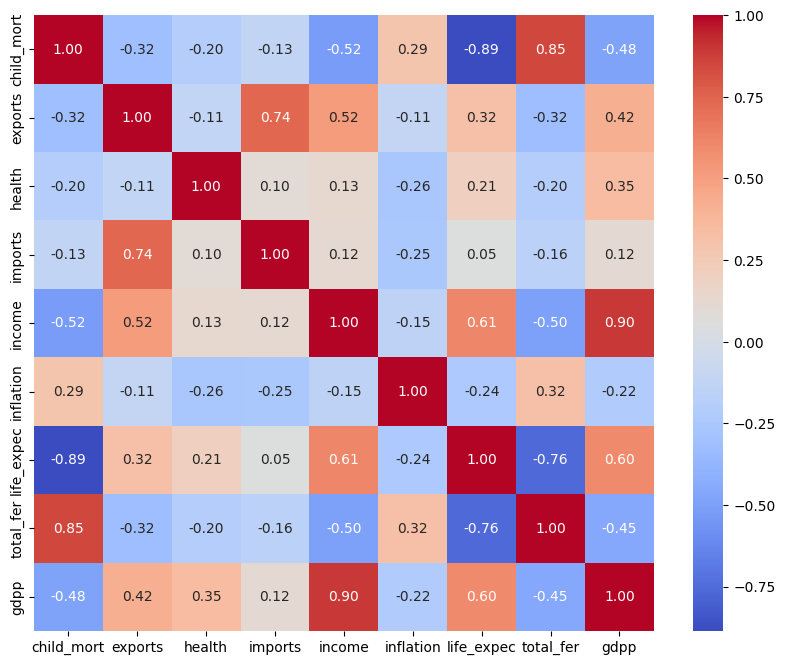

In [148]:
correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [149]:
import plotly.express as px
three_feat_df = new_df[["gdpp","child_mort", "life_expec"]]
fig = px.scatter_3d(three_feat_df, x=three_feat_df.iloc[:,0], y=three_feat_df.iloc[:,1],
                    z=three_feat_df.iloc[:,2], width=1000, height=1000)
fig.show()



Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

In [150]:
# put your answer here

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

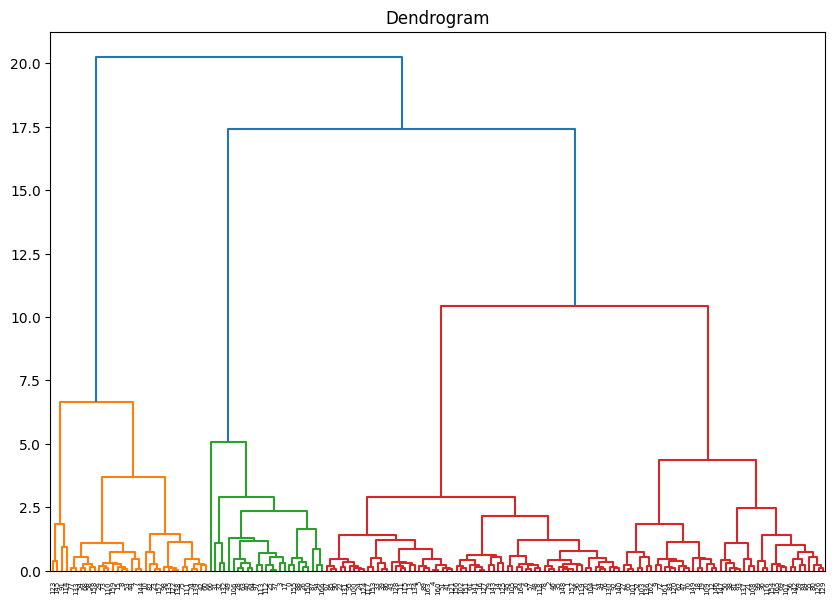

In [151]:
den = linkage(three_feat_df, method='ward')
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendro = dendrogram(den)

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

I chose 4 clusters due to seeing in the dendogram that beyond 4 clusters clearly separates each country groups.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [153]:
cluster_H = AgglomerativeClustering(n_clusters=4, linkage='ward')
model = cluster_H.fit(three_feat_df)
three_feat_df["Clusters"]= cluster_H.labels_


/tmp/ipython-input-2694180992.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [154]:
fig = px.scatter_3d(three_feat_df, x=three_feat_df['gdpp'], y=three_feat_df['child_mort'],
                    z=three_feat_df['life_expec'], color="Clusters", width=1000, height=1000)

fig.show()


Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

The country groups are made up of four clusters from low class countries all the way up to high class countries. Please refer to the cluster labels on the right, high class countries (cluster 0) has high average gdp, while having low child mortality rates and high life expectancy.

Further more high-middle class countries (cluster 1) has around normal gdp rates (not too much and not too little), while having almost the same (low) child mortality rate as cluster 0, although life expectancy within this countries start to drop.

Next is the low-middle class countries (cluster 2) has below average gdp, while having an increase in child mortality rates and decrease in life expectancy.

Lastly, is the low class countries (cluster 3) having almost the same avg gdp with cluster 2 but more child mortality rates and lower life expectancy.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Key insights about the country groupings within this dataframe is that the clustering exposed 3 groups—low, medium, and high class—showing that development variables such as GDP, life expectancy, and child mortality naturally form structured layers rather than a continuous gradient. The medium-class group can be split into 2, one subgroup shows improving life expectancy and falling mortality, while another lags despite similar economic levels.

The clusters also showed that once countries reach the high-medium bracket, further increases in GDP become less influential. Economic growth slows, yet health indicators still shift sharply, suggesting diminishing economic returns but large potential gains in well-targeted health or social investments. Overall, the clustering illustrates how development is uneven, nonlinear, and shaped by more than income revealing disparities that gdp alone cannot explain.